In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
import imblearn

from utils import get_dfs_full_resp

TREATMENT = "hcomp.txx.prop"

export_folder = f"../data/output/diagrams/{TREATMENT}"
os.makedirs(export_folder, exist_ok=True)

dfs = {}
dfs_full = {}

result_df = pd.DataFrame(index=range(105))
index=["Proposer", "Proposer + DSS"]
stats = pd.DataFrame(index=index)

#TREATMENTS = {"t00", "t10a", "t10b", "t11a", "t11b", "t11c"}
TREATMENTS_MAPPING = {
    "t00": "T0",
    "t10a": "T1.0",
    "t10b": "T1.1",
    "t11a": "T1.2",
    "t11b": "T1.3",
    "t11c": "T1.4",
    
}
TREATMENTS = TREATMENTS_MAPPING.values()

for treatment, new_treatment in TREATMENTS_MAPPING.items():

    # Read and sanitize the data
    df = pd.read_csv(f"../data/{treatment}/export/result__{treatment}_prop.csv")
    
    if treatment in {"t10", "t10a"}:
        df_feedback = pd.read_csv(f"../data/t10_feedback/export/result__t10_feedback_prop.csv")
        df = df.set_index("worker_id").join(df_feedback.set_index("worker_id"), rsuffix='_feedback').reset_index()
    
    df_full = df.copy()
    # drop_cols = ["worker_id", "resp_worker_id", "prop_worker_id", "updated", "status", "job_id", "status", "timestamp", "rowid", "offer_dss", "offer", "offer_final", "completion_code"]
    drop_cols = ["worker_id", "resp_worker_id", "prop_worker_id", "updated", "status", "job_id", "status", "timestamp", "rowid", "offer_dss", "offer", "offer_final", "completion_code", "prop_time_spent"]
    df = df[[col for col in df.columns if col not in drop_cols]]
    
    treatment = new_treatment
    dfs[treatment] = df
    dfs_full[treatment] = df_full
    result_df[treatment+"."+"offer"] = df_full["offer"]
    result_df[treatment+"."+"offer_final"] = df_full["offer_final"]
    stats[treatment.upper()] = [df_full["offer"].mean(), df_full["offer_final"].mean()]
    

cols = [col for col in df.columns if col != "min_offer"] + ["min_offer"]

dfs_full_resp = get_dfs_full_resp()

/usr/local/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
result_df.describe()

,T0.offer,T0.offer_final,T1.0.offer,T1.0.offer_final,T1.1.offer,T1.1.offer_final,T1.2.offer,T1.2.offer_final,T1.3.offer,T1.3.offer_final,T1.4.offer,T1.4.offer_final
count,103.000000,103.000000,105.000000,105.000000,105.000000,105.000000,103.000000,103.000000,105.000000,105.000000,102.000000,102.000000
mean,43.592233,43.592233,41.476190,45.666667,44.714286,49.380952,46.990291,48.155340,46.666667,49.285714,44.558824,46.470588
std,14.974119,14.974119,15.315964,14.495800,16.782382,14.588840,13.920992,13.320894,17.929706,14.081298,19.180009,17.371711
min,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
25%,40.000000,40.000000,35.000000,50.000000,40.000000,50.000000,45.000000,50.000000,40.000000,50.000000,40.000000,40.000000
50%,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
75%,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
max,100.000000,100.000000,80.000000,90.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [3]:
# # sns.set()
# stats.T.plot.bar()

    
# #tmp_stats = stats[["T0.P", "TAI.Pu", "TAI.Pn", "TXAI.Pu", "TXAI.Pi", "TXAI.Pua"]]
# tmp_stats = stats
# tmp_stats.T.plot.bar()

# 100*(tmp_stats.iloc[1] - tmp_stats.iloc[0]) / tmp_stats.iloc[0]

# # sns.barplot(y=index, data=stats.T)
# print(tmp_stats.to_latex())

**Correlation to the target value**

**Responder's min_offer / Proposer's over and final_offer distribution**

No handles with labels found to put in legend.


../data/output/diagrams/hcomp.txx.prop


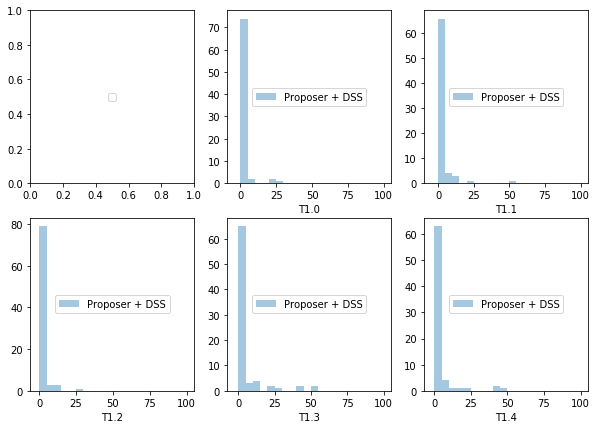

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

In [4]:

bins = list(range(0, 105, 5))

idx = 0

f, axes = plt.subplots(2, 3, figsize=(10, 7))

for treatment in TREATMENTS:
    ax = axes[idx//3, idx%3]
    df = dfs_full[treatment]
    fig = plt.figure(figsize=(5, 4))
#     ax = sns.distplot(df["offer"], hist=True, kde=False, bins=bins, ax=axes[idx//3, idx%3],  axlabel=treatment, label="Proposer")
#     _ = ax.legend()
    if treatment.upper() != "T0":
        ax = sns.distplot(df["offer"] - df["offer_final"], hist=True, kde=False, bins=bins, ax=axes[idx//3, idx%3],  axlabel=treatment, label="Proposer + DSS")
    _ = ax.legend(loc="center")
    
    idx += 1

plt.tight_layout()
f.savefig(os.path.join(export_folder, "offers.pdf"), bbox_inches='tight')

print(export_folder)



../data/output/diagrams/hcomp.txx.prop


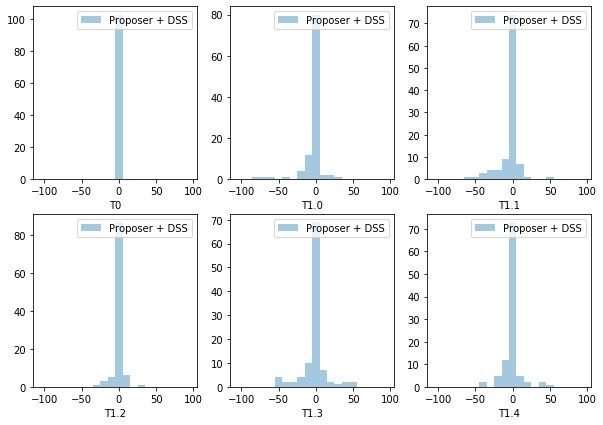

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

In [5]:

bins = list(range(-105, 105, 10))

idx = 0

f, axes = plt.subplots(2, 3, figsize=(10, 7))

for treatment in TREATMENTS:
    ax = axes[idx//3, idx%3]
    df = dfs_full[treatment]
    fig = plt.figure(figsize=(5, 4))
#     ax = sns.distplot(df["offer"], hist=True, kde=False, bins=bins, ax=axes[idx//3, idx%3],  axlabel=treatment, label="Proposer")
#     _ = ax.legend()
    if treatment.upper():# != "T0":
        ax = sns.distplot(df["offer"] - df["offer_final"], hist=True, kde=False, bins=bins, ax=axes[idx//3, idx%3],  axlabel=treatment, label="Proposer + DSS")
        ax.legend()
    #_ = ax.legend(loc="center")
    
    idx += 1

plt.tight_layout()
f.savefig(os.path.join(export_folder, "offers_diff_hist.pdf"), bbox_inches='tight')

print(export_folder)

../data/output/diagrams/hcomp.txx.prop


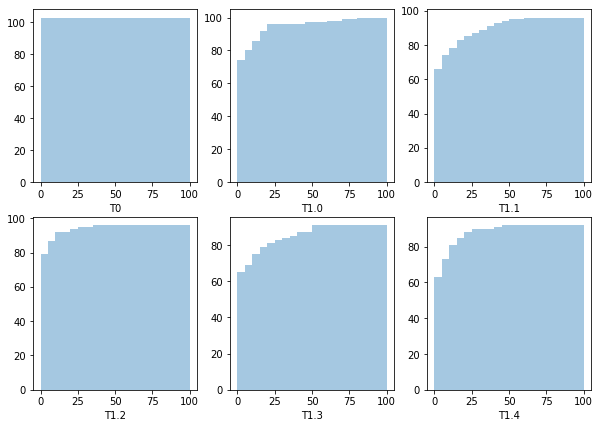

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

In [6]:

bins = list(range(0, 105, 5))

idx = 0

f, axes = plt.subplots(2, 3, figsize=(10, 7))

kwargs = {'cumulative': True}
ax = axes
for treatment in TREATMENTS:
    ax = axes[idx//3, idx%3]
    df = dfs_full[treatment]
    fig = plt.figure(figsize=(5, 4))
    #ax = sns.distplot(df["offer"], hist=True, kde=False, hist_kws=kwargs, bins=bins, ax=axes[idx//3, idx%3],  axlabel=treatment)
    #_ = ax.legend()
    if treatment.upper():# != "T0":
        ax = sns.distplot( df["offer_final"] - df["offer"], hist=True, kde=False, hist_kws=kwargs, kde_kws=kwargs, bins=bins, ax=ax,  axlabel=treatment)
        #ax.legend()
    #_ = ax.legend(loc="center")
    
    idx += 1

plt.tight_layout()
f.savefig(os.path.join(export_folder, "offers_diff_hist_cumul.pdf"), bbox_inches='tight')

print(export_folder)

(21,) (21,)
(21,) (21,)
(21,) (21,)
(21,) (21,)
(21,) (21,)
../data/output/diagrams/hcomp.txx.prop


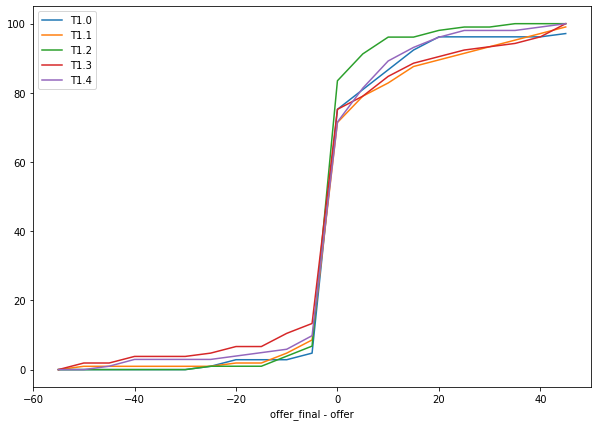

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

In [7]:

bins = np.array(list(range(-55, 55, 5)))
idx = 0

f, axes = plt.subplots(1, 1, figsize=(10, 7))

kwargs = {'cumulative': True}
ax = axes
for treatment in TREATMENTS:
    #ax = axes[idx//3, idx%3]
    df = dfs_full[treatment]
    fig = plt.figure(figsize=(5, 4))
    #ax = sns.distplot(df["offer"], hist=True, kde=False, hist_kws=kwargs, bins=bins, ax=axes[idx//3, idx%3],  axlabel=treatment)
    #_ = ax.legend()
    if treatment.upper() != "T0":
        x = bins[:-1]
        y = np.cumsum(np.histogram(df["offer_final"] - df["offer"], bins=bins)[0])
        y = 100 * y / df.shape[0]
        print(x.shape, y.shape)
        ax = sns.lineplot(x, y, label=treatment, ax=ax)
        ax.set(xlabel ="offer_final - offer")
        #ax.legend()
    #_ = ax.legend(loc="center")
    
    idx += 1

plt.tight_layout()
f.savefig(os.path.join(export_folder, "final-offer_diff_hist_cumul.pdf"), bbox_inches='tight')

print(export_folder)

(20,) (21,)
(20,) (21,)
(20,) (21,)
(20,) (21,)
(20,) (21,)
../data/output/diagrams/hcomp.txx.prop


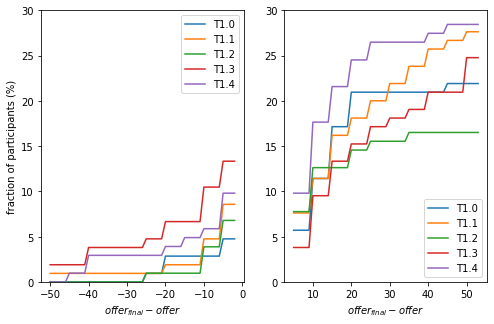

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

In [23]:

bins = np.array(list(range(-50, 55, 5)))
bins_neg = np.array(list(range(-50, 0)))
bins_pos = np.array(list(range(5, 55)))

idx = 0

f, axes = plt.subplots(1, 2, figsize=(8, 5))

kwargs = {'cumulative': True}
ax = axes
for treatment in TREATMENTS:
    #ax = axes[idx//3, idx%3]
    df = dfs_full[treatment]
    fig = plt.figure(figsize=(5, 4))
    #ax = sns.distplot(df["offer"], hist=True, kde=False, hist_kws=kwargs, bins=bins, ax=axes[idx//3, idx%3],  axlabel=treatment)
    #_ = ax.legend()
    if treatment.upper() != "T0":
        x = bins[:-1]
        y_neg = np.cumsum(np.histogram(df["offer_final"] - df["offer"], bins=bins_neg)[0])
        y_neg = 100.0* y_neg / df.shape[0]
        y_pos = np.cumsum(np.histogram(df["offer_final"] - df["offer"], bins=bins_pos)[0])
        y_pos = 100.0* y_pos / df.shape[0]
        print(x.shape, y.shape)
        ax = axes[0]
        ax = sns.lineplot(x=bins_neg[:-1], y=y_neg, label=treatment, ax=ax)
        ax.set(xlabel ="$offer_{final} - offer$", ylabel='fraction of participants (%)')
        ax.set_ylim(0, 30)
        
        ax = axes[1]
        ax = sns.lineplot(x=bins_pos[:-1], y=y_pos, label=treatment, ax=ax)
        ax.set(xlabel ="$offer_{final} - offer$")
        ax.set_ylim(0, 30)
        #ax.legend()
    #_ = ax.legend(loc="center")
    
    idx += 1

plt.tight_layout()
f.savefig(os.path.join(export_folder, "final-offer_diff_hist_cumul_split.pdf"), bbox_inches='tight')

print(export_folder)

In [9]:

lst = []
index = []
for treatment in dfs_full:
    if treatment != "T0":
        index.append(treatment)
        corr = abs(dfs_full[treatment][["feedback_understanding", "feedback_explanation"]].corr().values[0][1])
        underst = dfs_full[treatment]["feedback_understanding"].mean()
        expl = dfs_full[treatment]["feedback_explanation"].mean()
        lst.append({'|correlation|': corr, 'understanding': underst, 'difficulty_to_explain': expl})
df = pd.DataFrame(lst)
df.index = index
print(df.to_latex(float_format="%.3f"))
df

\begin{tabular}{lrrr}
\toprule
{} &  difficulty\_to\_explain &  understanding &  |correlation| \\
\midrule
T1.0 &                  3.720 &          4.960 &          0.694 \\
T1.1 &                  3.705 &          5.114 &          0.439 \\
T1.2 &                  3.398 &          5.223 &          0.438 \\
T1.3 &                  3.933 &          5.019 &          0.416 \\
T1.4 &                  3.676 &          4.922 &          0.541 \\
\bottomrule
\end{tabular}



,difficulty_to_explain,understanding,|correlation|
T1.0,3.720000,4.960000,0.694228
T1.1,3.704762,5.114286,0.439310
T1.2,3.398058,5.223301,0.437868
T1.3,3.933333,5.019048,0.416116
T1.4,3.676471,4.921569,0.540667


In [10]:
import researchpy as rp
base = dfs_full["T1.0"]
other = dfs_full["T1.2"] 
for col in ["feedback_understanding", "feedback_explanation"]:
    table, res = rp.ttest(base[col], other[col], paired=False)
    diff = res.results[0] 
    dof = res.results[1]
    s = res.results[2]
    p = res.results[3]
    r = res.results[9]
    print(f"T1.0 vs T2.0: {col}: t({dof:.0f})={s}, p={p:.3f}")

T1.0 vs T2.0: feedback_understanding: t(151)=-0.9709, p=0.333
T1.0 vs T2.0: feedback_explanation: t(151)=0.9745, p=0.331


In [11]:
#print(dfs_full["T1.2"].columns)

mean = dfs_full["T1.0"][["feedback_understanding", "feedback_explanation"]].mean()
print(mean)
mean = dfs_full["T1.1"][["feedback_understanding", "feedback_explanation"]].mean()
print(mean)

mean = dfs_full["T1.2"][["feedback_understanding", "feedback_explanation"]].mean()
print(mean)
mean = dfs_full["T1.3"][["feedback_understanding", "feedback_explanation"]].mean()
print(mean)
mean = dfs_full["T1.4"][["feedback_understanding", "feedback_explanation"]].mean()
print(mean)

feedback_understanding    4.96
feedback_explanation      3.72
dtype: float64
feedback_understanding    5.114286
feedback_explanation      3.704762
dtype: float64
feedback_understanding    5.223301
feedback_explanation      3.398058
dtype: float64
feedback_understanding    5.019048
feedback_explanation      3.933333
dtype: float64
feedback_understanding    4.921569
feedback_explanation      3.676471
dtype: float64


../data/output/diagrams/hcomp.txx.prop


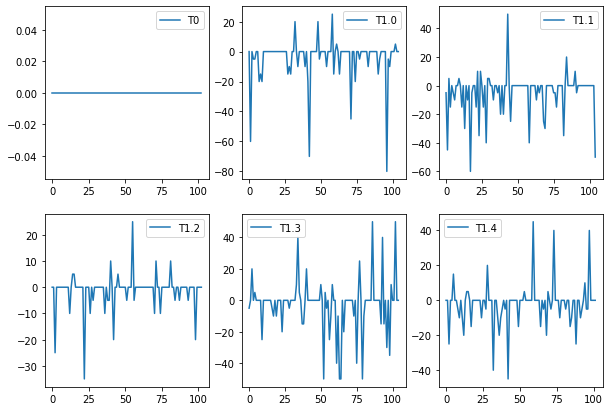

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

In [12]:

bins = list(range(-105, 105, 10))

idx = 0

f, axes = plt.subplots(2, 3, figsize=(10, 7))
ax = axes[0]
for treatment in TREATMENTS:
    df = dfs_full[treatment]
    fig = plt.figure(figsize=(5, 4))
#     ax = sns.distplot(df["offer"], hist=True, kde=False, bins=bins, ax=axes[idx//3, idx%3],  axlabel=treatment, label="Proposer")
#     _ = ax.legend()
    if treatment.upper():# != "T0":
        ax = sns.lineplot(x=df.index, y=df["offer"] - df["offer_final"], ax=axes[idx//3, idx%3], label=treatment)
    _ = ax.legend()
    
    
    idx += 1

plt.tight_layout()
f.savefig(os.path.join(export_folder, "offers_line_diff_multi.pdf"), bbox_inches='tight')

print(export_folder)

No handles with labels found to put in legend.


../data/output/diagrams/hcomp.txx.prop


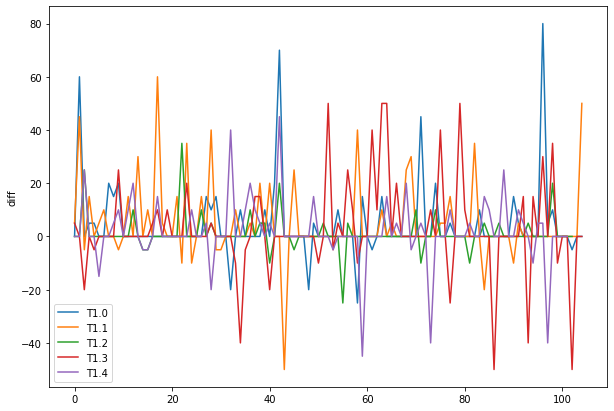

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

In [13]:

bins = list(range(-105, 105, 10))

idx = 0

f, axes = plt.subplots(1, 1, figsize=(10, 7))
ax = axes
for treatment in TREATMENTS:
    df = dfs_full[treatment]
    df["diff"] = df["offer_final"] - df["offer"]
    fig = plt.figure(figsize=(5, 4))
#     ax = sns.distplot(df["offer"], hist=True, kde=False, bins=bins, ax=axes[idx//3, idx%3],  axlabel=treatment, label="Proposer")
#     _ = ax.legend()
    if treatment.upper() != "T0":
        ax = sns.lineplot(x=df.index, y=df["diff"], ax=ax, label=treatment)
    _ = ax.legend()
    
    
    idx += 1

plt.tight_layout()
f.savefig(os.path.join(export_folder, "offers_line_diff_single.pdf"), bbox_inches='tight')

print(export_folder)

In [14]:
np.histogram(df.offer)

(array([ 8,  8,  6, 11, 57,  6,  0,  1,  1,  4]),
 array([  5. ,  14.5,  24. ,  33.5,  43. ,  52.5,  62. ,  71.5,  81. ,
         90.5, 100. ]))

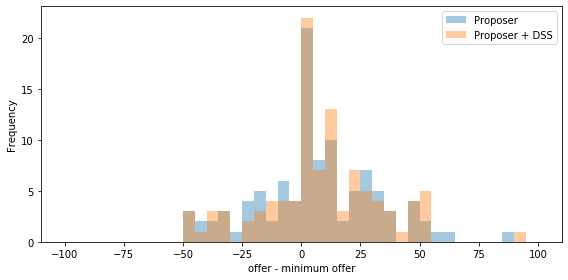

In [15]:
bins = list(range(-100, 105, 5))

plt.figure(figsize=(8,4))
offer_min_offer_diff = df_full["offer"] - df_full["min_offer"]
ax = sns.distplot(offer_min_offer_diff, hist=True, kde=False, axlabel="offer - minimum offer", bins=bins, label="Proposer")
_ = ax.set_ylabel("Frequency")


offer_min_offer_diff = df_full["offer_final"] - df_full["min_offer"]
ax = sns.distplot(offer_min_offer_diff, hist=True, kde=False, axlabel="offer - minimum offer", bins=bins, label="Proposer + DSS", ax=ax)
plt.legend()
plt.tight_layout()
ax.figure.savefig(os.path.join(export_folder, "offer-min_offer.pdf"))

In [16]:
from core.models.metrics import cross_compute, avg_gain_ratio, gain_mean, rejection_ratio, loss_sum, MAX_GAIN

def get_infos(min_offer, offer, metrics=None, do_cross_compute=False):
    if metrics is None:
        metrics = [avg_gain_ratio, gain_mean, rejection_ratio, loss_sum]
    #df = pd.DataFrame()
    size1, size2 = len(min_offer), len(offer)
    if size1 != size2:
        print("WARNING: different shapes!!!", size1, size2)
        min_size = min(size1, size2)
        min_offer = min_offer[:min_size]
        offer = offer[:min_size]
    infos = dict()
    for idx, metric in enumerate(metrics):
        if do_cross_compute:
            infos[metric.__name__] = cross_compute(min_offer, offer, metric)
        else:
            infos[metric.__name__] = metric(min_offer, offer)

    return infos

**Proposer's performance**

In [17]:
#print(dfs['TAI.Pu'].columns)
#print(result_df)
df_infos = pd.DataFrame()
# Previous computation
#df_infos = df_infos.append(get_infos(result_df['t13a.min_offer'], result_df['t11a.offer']), ignore_index=True)
#df_infos = df_infos.append(get_infos(result_df['t13a.min_offer_final'], result_df['t11a.offer_final']), ignore_index=True)

df_infos = df_infos.append(get_infos(dfs_full_resp['TAI.R']['min_offer'], result_df['TAI.Pu.offer']), ignore_index=True)
df_infos = df_infos.append(get_infos(dfs_full_resp['TAI.R']['min_offer'], result_df['TAI.Pu.offer_final']), ignore_index=True)

#df_infos = df_infos.append(get_infos(df_full['min_offer'], [fixed_offer], do_cross_compute=True), ignore_index=True)

df_infos.index = ["TAI.Pu vs TAI.R", "TAI.Pu + DSS vs TAI.R"]

df_infos


KeyError: 'TAI.R'

In [ ]:
df_infos = pd.DataFrame()
# Previous computation
#df_infos = df_infos.append(get_infos(result_df['t13a.min_offer'], result_df['t11a.offer']), ignore_index=True)
#df_infos = df_infos.append(get_infos(result_df['t13a.min_offer_final'], result_df['t11a.offer_final']), ignore_index=True)

df_infos = df_infos.append(get_infos(dfs_full_resp['TXAI.R']['min_offer'], dfs_full['TXAI.Pu']['offer']), ignore_index=True)
df_infos = df_infos.append(get_infos(dfs_full_resp['TXAI.R']['min_offer'], dfs_full['TXAI.Pu']['offer_final']), ignore_index=True)


df_infos.index = ["TXAI.Pu vs TXAI.R", "TXAI.Pu + DSS vs TXAI.R"]

df_infos


In [ ]:

plt.figure(figsize=(5,3))
tmp = pd.DataFrame()
tmp["TAI.Pu#offer"] = result_df["TAI.Pu.offer"] - result_df["TAI.Pu.offer_final"]
tmp["TXAI.Pu#offer"] = result_df["TXAI.Pu.offer"] - result_df["TXAI.Pu.offer_final"]


bins = np.arange(-100, 100, 5)
ax = sns.distplot(tmp["TAI.Pu#offer"], hist=True, kde=False, axlabel="Responder minimum offer", bins=bins, label="TAI.Pu")
ax = sns.distplot(tmp["TXAI.Pu#offer"], hist=True, kde=False, axlabel="offer - offer_dss", bins=bins, label="TXAI.Pu")
ax.legend(loc='best')
_ = ax.set_ylabel("Frequency")
ax.set_yscale('log')
plt.tight_layout()


ax.figure.savefig(os.path.join(export_folder, "t10avst11adiff.pdf"))

In [ ]:
sns.lineplot(x="TAI.Pu.offer", y="TAI.Pu.offer_final", data=result_df)
sns.lineplot(x="TXAI.Pu.offer", y="TXAI.Pu.offer_final", data=result_df)

In [ ]:
tmp.describe()

In [ ]:
dfs_full["T1."]